In [33]:
import pandas as pd
import matplotlib 
%matplotlib inline
import seaborn

In [34]:
df1=pd.read_csv("Other Files\YelpData.csv")

In [35]:
df2=pd.read_csv("Other Files\\ZomatoData.csv")

In [36]:
new_df = pd.merge(df1, df2,  how='inner', left_on=['name','zip_code'], right_on = ['name','zip_code'])

In [37]:
new_df.to_csv("joineddata.csv")

In [38]:
new_df['Price Rating Yelp']=new_df['price'].str.len()

In [39]:
new_df.columns

Index(['id_x', 'name', 'review_count', 'price', 'is_closed', 'latitude_x',
       'longitude_x', 'city_x', 'state', 'zip_code', 'country_x', 'rating',
       'phone', 'term', 'image_x', 'id_y', 'city_y', 'country_y', 'latitude_y',
       'longitude_y', 'price_range', 'rest_rating', 'rating_text', 'votes',
       'image_y', 'Price Rating Yelp'],
      dtype='object')

In [40]:
df=new_df.groupby(['city_x'])['rating','rest_rating'].mean().reset_index()

In [41]:
df=df.rename(columns = {'rating':'Yelp Restaurant Rating'})
df=df.rename(columns = {'rest_rating':'Zomato Restaurant Rating'})

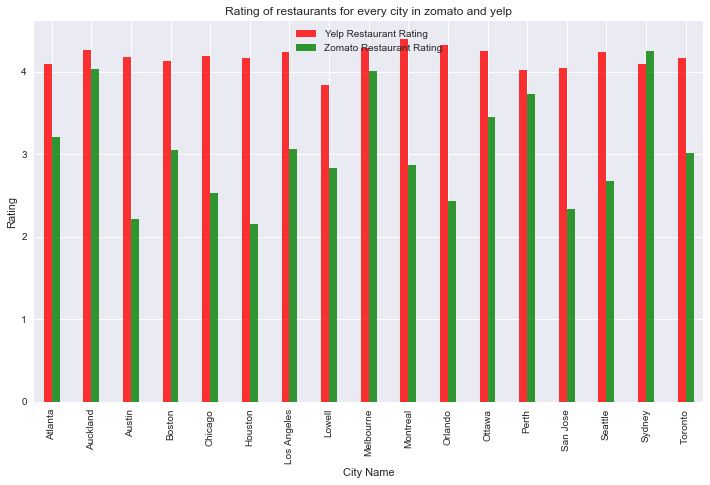

In [42]:
import matplotlib.pyplot as plt

bar_width = 0.40
opacity = 0.8
colors = ['r','g']
cols = ['Yelp Restaurant Rating','Zomato Restaurant Rating']
title = 'Rating of restaurants for every city in zomato and yelp'
ylabel = "Rating"
xlabel='City Name'

ax = df.set_index('city_x')[cols].plot.bar(width=bar_width,
                                                    alpha=opacity, 
                                                    figsize=(12,7), 
                                                    color=colors, 
                                                    title=title)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
plt.savefig(r'Output\Analysis 1\Analysis1-Rating.jpg')
ax.legend(loc='upper center',prop={'size':10})

In [61]:
df.to_csv("Output CSV/Analysis 1/Zomato and Yelp rating.csv")

In [43]:
new_df.groupby(['city_x'])['Price Rating Yelp','price_range'].mean().reset_index()

,city_x,Price Rating Yelp,price_range
0,Atlanta,2.056180,2.528090
1,Auckland,2.028571,3.257143
2,Austin,2.022989,2.137931
3,Boston,2.194444,3.000000
4,Chicago,2.023256,2.709302
5,Houston,2.000000,2.734694
6,Los Angeles,2.088889,2.088889
7,Lowell,1.629630,1.666667
8,Melbourne,2.150000,3.350000
9,Montreal,2.214286,2.285714


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
new_df.columns

Index(['id_x', 'name', 'review_count', 'price', 'is_closed', 'latitude_x',
       'longitude_x', 'city_x', 'state', 'zip_code', 'country_x', 'rating',
       'phone', 'term', 'image_x', 'id_y', 'city_y', 'country_y', 'latitude_y',
       'longitude_y', 'price_range', 'rest_rating', 'rating_text', 'votes',
       'image_y', 'Price Rating Yelp'],
      dtype='object')

Plots saved successfully


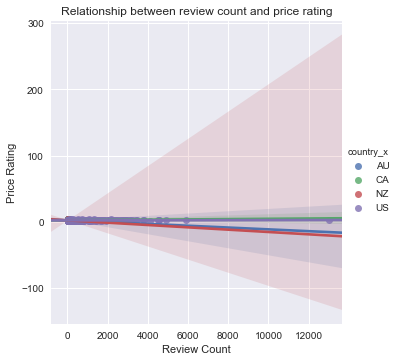

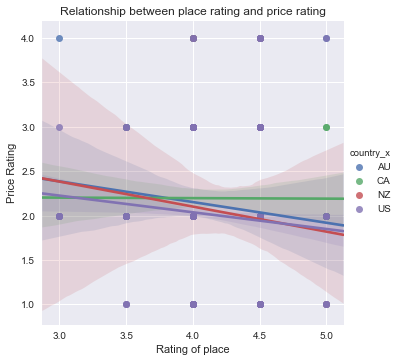

In [46]:
bb=new_df[(new_df['rating'].notnull())&(new_df['Price Rating Yelp'].notnull())]
corrfactor=bb.corr()[['review_count','rating','Price Rating Yelp']]
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(style="darkgrid")
#df.applymap(atof)


#figure = plt.subplots(ncols=2, sharey=True)

plt.figure(figsize=(45,10))
sns.lmplot(x="review_count", y="Price Rating Yelp", hue='country_x',data=new_df)
plt.title('Relationship between review count and price rating')
plt.xlabel('Review Count')
plt.ylabel('Price Rating')
#plt.savefig(r"Output Files\Analysis 5\Plot\Review Count Vs Place Rating.jpg")
sns.lmplot(x="rating", y="Price Rating Yelp", hue='country_x',data=new_df)
#plot.text
#plt.yticks([1, 0.1, 0.01, 0.001])
#f = plt.figure()
plt.title('Relationship between place rating and price rating')
plt.xlabel('Rating of place')
plt.ylabel('Price Rating')
#plt.savefig(r"Output Files\Analysis 5\Plot\Rating of place Vs Place Rating.jpg")
print("Plots saved successfully")
plt.show()

Plots saved successfully


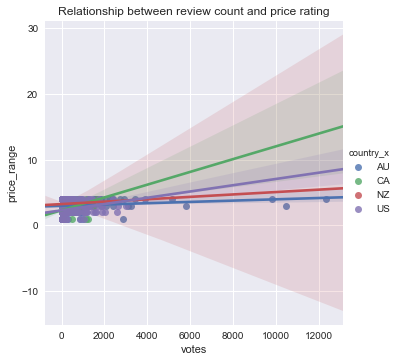

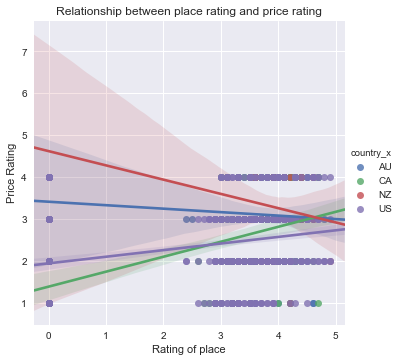

In [47]:
bb=new_df[(new_df['rest_rating'].notnull())&(new_df['price_range'].notnull())]
corrfactor=bb.corr()[['votes','rest_rating','price_range']]
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(style="darkgrid")
#df.applymap(atof)


#figure = plt.subplots(ncols=2, sharey=True)

plt.figure(figsize=(45,10))
sns.lmplot(x="votes", y="price_range", hue='country_x',data=new_df)
plt.title('Relationship between review count and price rating')
plt.xlabel('votes')
plt.ylabel('price_range')
#plt.savefig(r"Output Files\Analysis 5\Plot\Review Count Vs Place Rating.jpg")
sns.lmplot(x="rest_rating", y="price_range", hue='country_x',data=new_df)
#plot.text
#plt.yticks([1, 0.1, 0.01, 0.001])
#f = plt.figure()
plt.title('Relationship between place rating and price rating')
plt.xlabel('Rating of place')
plt.ylabel('Price Rating')
#plt.savefig(r"Output Files\Analysis 5\Plot\Rating of place Vs Place Rating.jpg")
print("Plots saved successfully")
plt.show()

In [48]:
new_normalized=new_df

In [49]:
new_normalized['Normalized_Price_Yelp']=(new_normalized['Price Rating Yelp']-new_normalized['Price Rating Yelp'].min())/(new_normalized['Price Rating Yelp'].max()-new_normalized['Price Rating Yelp'].min())

In [50]:
new_df.columns

Index(['id_x', 'name', 'review_count', 'price', 'is_closed', 'latitude_x',
       'longitude_x', 'city_x', 'state', 'zip_code', 'country_x', 'rating',
       'phone', 'term', 'image_x', 'id_y', 'city_y', 'country_y', 'latitude_y',
       'longitude_y', 'price_range', 'rest_rating', 'rating_text', 'votes',
       'image_y', 'Price Rating Yelp', 'Normalized_Price_Yelp'],
      dtype='object')

In [51]:
new_normalized['Normalized_Review_Count']=((new_normalized['review_count']-new_normalized['review_count'].min())/(new_normalized['review_count'].max()-new_normalized['review_count'].min()))

In [52]:
new_normalized['Normalized_Zomato_Rating']=(new_normalized['rest_rating']-new_normalized['rest_rating'].min())/(new_normalized['rest_rating'].max()-new_normalized['rest_rating'].min())

In [53]:
new_normalized['Normalized_Review_Count_Zomato']=((new_normalized['votes']-new_normalized['votes'].min())/(new_normalized['votes'].max()-new_normalized['votes'].min()))

In [54]:
new_normalized['Overall_Rating_Yelp']=new_normalized['Normalized_Price_Yelp']*new_normalized['Normalized_Review_Count']

In [55]:
new_normalized['Overall_Rating_Zomato']=new_normalized['Normalized_Zomato_Rating']*new_normalized['Normalized_Review_Count_Zomato']

In [56]:
new_normalized['Overall_Rating_Yelp_scaled']=new_normalized['Overall_Rating_Yelp']*100
new_normalized['Overall_Rating_Zomato_scaled']=new_normalized['Overall_Rating_Zomato']*100

In [57]:
new_normalized_sorted_yelp = new_normalized.sort_values('Overall_Rating_Yelp_scaled',ascending=False)

In [58]:
new_normalized_sorted_zomato = new_normalized.sort_values('Overall_Rating_Zomato_scaled',ascending=False)